In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xgi

## Figure 2

In [2]:
from scipy.spatial import ConvexHull

In [3]:
def _draw_hull(node_pos, ax, edges_ec, facecolor, alpha, zorder, radius):
    """Draw a convex hull encompassing the nodes in node_pos

    Parameters
    ----------
    node_pos : np.array
        nx2 dimensional array containing positions of the nodes
    ax : matplotlib.pyplot.axes
    edges_ec : str
        Color of the border of the convex hull
    facecolor : str
        Filling color of the convex hull
    alpha : float
        Transparency of the convex hull
    radius : float
        Radius of the convex hull in the vicinity of the nodes.

    Returns
    -------
    ax : matplotlib.pyplot.axes

    """

    thetas = np.linspace(0, 2 * np.pi, num=1000, endpoint=False)
    offsets = radius * np.array([np.cos(thetas), np.sin(thetas)]).T
    points = np.vstack([p + offsets for p in node_pos])
    points = np.vstack([node_pos, points])

    hull = ConvexHull(points)

    for simplex in hull.simplices:
        ax.plot(
            points[simplex, 0],
            points[simplex, 1],
            color=edges_ec,
            zorder=zorder,
            linewidth=3,
            linestyle="dotted",
        )
    ax.fill(
        points[hull.vertices, 0],
        points[hull.vertices, 1],
        color=facecolor,
        alpha=alpha,
        zorder=zorder,
    )

    return ax

In [4]:
triangles = [[1, 2, 3], [11, 6, 7]]
edges = [
    [
        2,
        4,
    ],
    [4, 5],
    [2, 11],
    [2, 8],
    [8, 9],
    [2, 9],
    [8, 10],
    [1, 12],
    [12, 13],
    [13, 14],
    [12, 14],
]
example_SC = xgi.SimplicialComplex()
example_SC.add_simplices_from(triangles)
example_SC.add_simplices_from(edges)

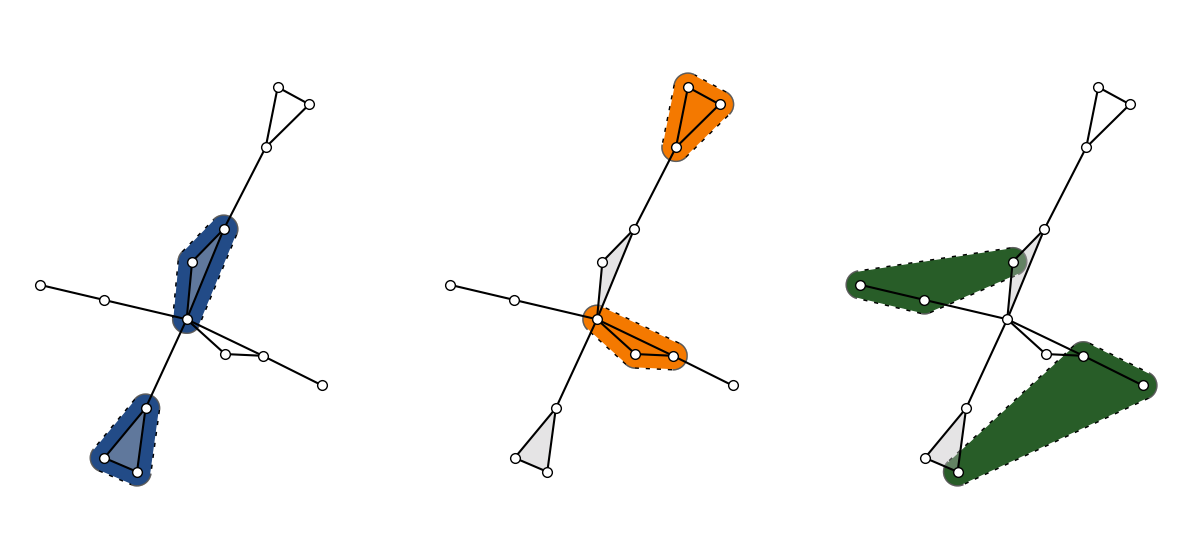

In [5]:
pos = xgi.pairwise_spring_layout(example_SC, seed=1)

colors = ["#224b87", "#f47900", "#285d28"]

fig, axs = plt.subplots(1, 3, figsize=(15, 7))
simplex_1 = [pos[1], pos[2], pos[3]]
simplex_2 = [pos[11], pos[6], pos[7]]
_draw_hull(
    simplex_1,
    ax=axs[0],
    edges_ec="black",
    facecolor=colors[0],
    alpha=1,
    zorder=0,
    radius=0.06,
)
_draw_hull(
    simplex_2,
    ax=axs[0],
    edges_ec="black",
    facecolor=colors[0],
    alpha=1,
    zorder=0,
    radius=0.06,
)
xgi.draw(example_SC, pos, ax=axs[0], node_size=7, edge_fc="#bebcbeff")

clique_list_1 = [pos[2], pos[8], pos[9]]
clique_list_2 = [pos[12], pos[13], pos[14]]
_draw_hull(
    clique_list_1,
    ax=axs[1],
    edges_ec="black",
    facecolor=colors[1],
    alpha=1,
    zorder=0,
    radius=0.06,
)
_draw_hull(
    clique_list_2,
    ax=axs[1],
    edges_ec="black",
    facecolor=colors[1],
    alpha=1,
    zorder=0,
    radius=0.06,
)
xgi.draw(example_SC, pos, ax=axs[1], node_size=7, edge_fc="#bebcbeff")

random_list_1 = [pos[8], pos[10], pos[7]]
random_list_2 = [pos[3], pos[4], pos[5]]
_draw_hull(
    random_list_1,
    ax=axs[2],
    edges_ec="black",
    facecolor=colors[2],
    alpha=1,
    zorder=0,
    radius=0.06,
)
_draw_hull(
    random_list_2,
    ax=axs[2],
    edges_ec="black",
    facecolor=colors[2],
    alpha=1,
    zorder=0,
    radius=0.06,
)
xgi.draw(example_SC, pos, ax=axs[2], node_size=7, edge_fc="#bebcbeff")

plt.savefig("./figures/figure2_draft.pdf", dpi=600, bbox_inches="tight")